In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import shutil
os.chdir('D:\Education\BMSTU\Diploma_Master\_my_work')

import tensorflow as tf
from models import network
from utils import scheduler
from data import dataset

# 300W_LP

In [ ]:
test_it = dataset.make_dataset_iterator(
  data_name='300w_lp',
  mode='test',
  data_dir='data\\300w_lp',
  data_dim=64,
  batch_size=64,
  train_size=0.7,
  val_size=0.15,
  test_size=0.15,
)

In [ ]:
from models import pose

net = network.Network(
    model=pose.PoseEstimator({
        'data_dim': 64,
        'pose_lambda_d': 1.0,
        'pose_stage_base': [3, 3, 3],
        'pose_n_caps1': 21,
        'pose_n_caps1_dim': 5,
        'pose_n_caps2': 3,
        'pose_n_caps2_dim': 16,
        'pose_routing': 2,
    }),
    checkpoint_dir='capsnet\\checkpoints\\300w_lp',
    optimizer_type='adam',
    learning_rate=scheduler.lr_func)

net.restore(epoch=40)


In [ ]:
for i in range(5):
  data = test_it.get_next()
x, y = data[0], data[1]

y_pred = net.model.predict(x)


In [ ]:
from utils import visualization

print('Inputs')
visualization.plot_image(2, 2, x, 0, 255)

In [ ]:
l0 = y[0][0] * 20
l1 = y[0][1] * 20
l2 = y[0][2] * 20
b0 = y[0][3] * 20
b1 = y[0][4] * 20
b2 = y[0][5] * 20
f0 = y[0][6] * 20
f1 = y[0][7] * 20
f2 = y[0][8] * 20
l0_pred = y_pred[0][0] * 20
l1_pred = y_pred[0][1] * 20
l2_pred = y_pred[0][2] * 20
b0_pred = y_pred[0][3] * 20
b1_pred = y_pred[0][4] * 20
b2_pred = y_pred[0][5] * 20
f0_pred = y_pred[0][6] * 20
f1_pred = y_pred[0][7] * 20
f2_pred = y_pred[0][8] * 20

In [ ]:
import matplotlib.pyplot as plt

# Creating plot
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].imshow(x[0], cmap='gray', norm=None, vmin=0, vmax=1, origin='lower')
ax[0].arrow(0, 0, l0, l1, color='red')
ax[0].arrow(0, 0, b0, b1, color='green')
ax[0].arrow(0, 0, f0, f1, color='blue')
ax[0].axis([-10, 64, 64, -10])

ax[1].imshow(x[0], cmap='gray', norm=None, vmin=0, vmax=1, origin='lower')
ax[1].arrow(0, 0, l0_pred, l1_pred, color='red')
ax[1].arrow(0, 0, b0_pred, b1_pred, color='green')
ax[1].arrow(0, 0, f0_pred, f1_pred, color='blue')
ax[1].axis([-10, 64, 64, -10])

plt.show()

# CELEB_A

In [21]:
train_it = dataset.make_dataset_iterator(
  data_name='celeb_a',
  mode='train',
  data_dir='data\\celeb_a',
  data_dim=80,
  batch_size=32,
  train_size=0.7,
  val_size=0.15,
  test_size=0.15,
)

Generating partitions (Train=0.7, Val=0.15, Test=0.15)
Partitions file already generated



In [22]:
print(train_it)
for data in train_it:
  image, label = data[0], data[1]
  break

<ShuffleDataset shapes: ((32, 80, 80, 3), (32,)), types: (tf.float32, tf.int64)>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


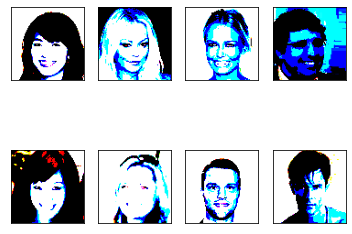

In [23]:
from utils import visualization

visualization.plot_image(2, 4, image)


In [15]:
from models import capsule

net = network.Network(
    model=capsule.Extractor({
        'fe_n_caps1': 21,
        'fe_n_caps1_dim': 5,
        'fe_n_caps2': 10,
        'fe_n_caps2_dim': 16,
        'fe_routing': 3}),
    checkpoint_dir='capsnet\\checkpoints\\siamese_ssr\\celeb_a',
    optimizer_type='adamax',
    learning_rate=scheduler.lr_func)
net.restore(epoch=50)


In [16]:
feat_a, feat_b = net.model.predict((image_a, image_b))

In [18]:
from utils import loss

print(loss.cor_feat(feat_a, feat_b))
print(feat_a[0])
print(feat_b[0])

tf.Tensor(
[[[ 6.31391536e-03]
  [-1.79327690e-04]
  [ 1.43352663e-03]
  [ 4.37526545e-03]
  [-9.26377543e-05]
  [ 1.03122067e+00]
  [ 8.05805717e-03]
  [ 2.74310317e-02]
  [ 5.52882648e-06]
  [ 1.47486932e-03]]

 [[-3.67608387e-04]
  [-5.47094933e-05]
  [-2.87110364e-04]
  [-2.01144401e-04]
  [-3.19319835e-04]
  [-3.59013327e-04]
  [ 5.35012659e-05]
  [ 3.21442873e-04]
  [-8.02257215e-04]
  [-4.72057174e-04]]

 [[ 7.08909752e-03]
  [ 2.70768913e-04]
  [ 2.51117488e-03]
  [ 4.53262078e-03]
  [ 5.85907546e-04]
  [ 1.04354000e+00]
  [ 1.05708623e-02]
  [ 2.73375642e-02]
  [ 9.43159161e-04]
  [ 1.53629412e-03]]

 [[-5.83081332e-04]
  [ 1.98956786e-06]
  [ 1.25815059e-04]
  [ 3.99647281e-04]
  [ 3.04851455e-05]
  [-1.55862980e-02]
  [-4.56505571e-04]
  [-3.04118090e-04]
  [-2.12838713e-04]
  [ 9.76174197e-05]]

 [[ 3.35908239e-03]
  [ 6.45019682e-05]
  [ 9.09830630e-03]
  [ 3.56977503e-03]
  [ 7.14443624e-03]
  [ 8.34101200e-01]
  [ 4.91133484e-04]
  [ 4.82816659e-02]
  [ 3.22721968e-03]
 

In [ ]:
net = network.Network(
    model=pose.PoseEstimator({
        'data_dim': 64,
        'pose_lambda_d': 1.0,
        'pose_stage_base': [3, 3, 3],
        'pose_n_caps1': 21,
        'pose_n_caps1_dim': 5,
        'pose_n_caps2': 3,
        'pose_n_caps2_dim': 16,
        'pose_routing': 2,
    }),
    checkpoint_dir='capsnet\\checkpoints\\300w_lp',
    optimizer_type='adam',
    learning_rate=scheduler.lr_func)

net.restore(epoch=40)


In [ ]:
for i in range(1):
  data = test_it.get_next()
x, y = data[0], data[1]

In [ ]:
y_pred = net.model.predict(x)

In [ ]:
l0_pred = y_pred[2][0] * 20
l1_pred = y_pred[2][1] * 20
l2_pred = y_pred[2][2] * 20
b0_pred = y_pred[2][3] * 20
b1_pred = y_pred[2][4] * 20
b2_pred = y_pred[2][5] * 20
f0_pred = y_pred[2][6] * 20
f1_pred = y_pred[2][7] * 20
f2_pred = y_pred[2][8] * 20

In [ ]:
import matplotlib.pyplot as plt

# Creating plot
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(x[2], cmap='gray', norm=None, vmin=0, vmax=1, origin='lower')
ax.arrow(0, 0, l0_pred, l1_pred, color='red')
ax.arrow(0, 0, b0_pred, b1_pred, color='green')
ax.arrow(0, 0, f0_pred, f1_pred, color='blue')
ax.axis([-10, 64, 64, -10])

plt.show()

In [ ]:
# tmp = {}
# count = 0
# for batch in test_it:
#   images, ids = batch[0], batch[1]
#   for image, id in zip(images, ids):
#     id = int(id)
#     if id not in tmp:
#       tmp[id] = [image]
#     else:
#       tmp[id].append(image)
  
#   count += 1
#   if count > 10:
#     break

In [ ]:
# from utils import visualization

# count = 0
# for id, images in tmp.items():
#   print(id)
#   visualization.plot_image(2, 2, images)
#   count += 1
#   if count > 5:
#     break


# VGG Face 

In [ ]:
from models import vggface
net_fe = vggface.Extractor({
            'n_class': 10177,
            'type': 'end2end'
        })

In [ ]:
train_it, val_it = dataset.make_dataset_iterator(
  data_name='celeb_a',
  mode='train',
  data_dir='data\\celeb_a',
  data_dim=224,
  batch_size=16,
  train_size=0.7,
  val_size=0.15,
  test_size=0.15,
)


In [ ]:
from utils.loss import cross_entropy

net_fe.compile(
    optimizer='adam',
    loss=cross_entropy,
    metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5)]
)

In [ ]:
net_fe.fit(x=train_it, epochs=100, validation_data = val_it)

# VGG Face 2

In [12]:
import tarfile

def untar(data_name, data_path, extract_path):
  print(f'Extracting {data_name} ...')
  tarobj = tarfile.open(data_path, 'r:gz', encoding='utf-8')
  tarobj.extractall(extract_path)

In [13]:
main_path = './data/vggface2'
data_path = os.path.join(main_path, 'data')
meta_path = os.path.join(main_path, 'meta')

train_tar = os.path.join(data_path, 'vggface2_train.tar.gz')
test_tar = os.path.join(data_path, 'vggface2_test.tar.gz')

extract_func = untar

In [14]:
extract_func('vggface2_train', train_tar, data_path)


Extracting vggface2_train ...


In [22]:
for filename in os.listdir(data_path):
  f = os.path.join(data_path, filename)
  # checking if it is a file
  if os.path.isfile(f) and f.endswith('.tar.gz'):
      print(f)

./data/vggface2\data\vggface2_test.tar.gz
./data/vggface2\data\vggface2_train.tar.gz


# MNIST

In [4]:
from models import capsule

net = network.Network(
    model=capsule.Extractor({
        'fe_n_caps1': 21,
        'fe_n_caps1_dim': 5,
        'fe_n_caps2': 10,
        'fe_n_caps2_dim': 16,
        'fe_routing': 3,
    }),
    checkpoint_dir='capsnet\\checkpoints\\mnist',
    optimizer_type='adamax',
    learning_rate=scheduler.lr_func)

net.restore(epoch=9)

In [3]:
import tensorflow as tf


resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(80, 80, 3),
    pooling=None,
)

resnet.output


<tf.Tensor 'conv5_block3_out/Relu_1:0' shape=(None, 3, 3, 2048) dtype=float32>

In [19]:
import tensorflow as tf

pair_y = tf.constant([[1], [0]], dtype=tf.float32)
print(pair_y.shape)


(2, 1)


[autoreload of capsnet.flag failed: Traceback (most recent call last):
  File "d:\Softwares\miniconda3\envs\py38_tf23\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "d:\Softwares\miniconda3\envs\py38_tf23\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "d:\Softwares\miniconda3\envs\py38_tf23\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "D:\Education\BMSTU\Diploma_Master\_my_work\capsnet\flag.py", line 6, in <module>
    flags.DEFINE_string('type', 'siamese_ssr', 'Choose from : {end2end, pose_only, siamese_ssr, siamese_ori}')
  File "d:\Softwares\miniconda3\envs\py38_tf23\lib\site-packages\absl\